In [1]:
!git clone https://github.com/ChenaoB/Database

Cloning into 'Database'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 52 (delta 4), reused 3 (delta 3), pack-reused 47
Receiving objects: 100% (52/52), 53.18 KiB | 2.42 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [2]:
'''
Packages necesarios
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generación de los datos

In [3]:
"""
Se transfiere la data a pandas
"""
df = pd.read_csv("/content/Database/DataLeastSquareClasificationtTwoClass.csv")

In [4]:
"""
Se divide el dataset en 75 para entrenamiento y el restante para test
"""
train_set = df.sample(frac = 0.75, random_state=39)
test_set = df.drop(train_set.index)

"""
Tengo 2 entradas: X1 X2 (Por tanto es un problema biclase)
Tengo 2 tags: 1, -1 (Esto sería 1 salida)
"""
print(train_set[:5])
print(test_set[:5])

print(train_set.shape)
print(test_set.shape)

          X1        X2  Y
22  2.658757  2.761905 -1
53 -0.977697  0.554048  1
84  0.215368  2.120182  1
57  0.604397  1.800420  1
87 -0.434967  1.226852  1
          X1        X2  Y
4   2.806944  2.885193 -1
9   0.476725 -0.366186 -1
12  2.830055  2.794111 -1
13  0.289153 -0.591639 -1
14  2.155935  1.772786 -1
(75, 3)
(25, 3)


In [5]:
'''
Creación de matrices
'''

# X para entrenamiento
x_train = np.zeros((train_set.shape[0], 2))
x_train[:, :] = train_set[['X1', 'X2']].values

# Y (Tags) para entrenamiento
y_train = np.zeros((train_set.shape[0], 1))
y_train[:, 0] = train_set['Y']

# Matrices para test
x_test = np.zeros((test_set.shape[0], 2))
y_test = np.zeros((test_set.shape[0], 1))

'''
Llenado de matrices
'''
x_test[:, :] = test_set[['X1', 'X2']].values
y_test[:, 0] = test_set['Y']

train_class_index = np.where(train_set['Y'] == -1)
y_train[train_class_index, 0] = 0

test_class_index = np.where(test_set['Y'] == -1)
y_test[test_class_index, 0] = 0

In [6]:
# Se muestran los primeros 5 datos para verificación

print(f"Matriz de datos de entrenamiento: \n{[[*data] for data in x_train[:5]]}")
print(f"Matriz de etiquetas de entrenamiento: \n{y_train[:5]}", end="\n\n")

print(f"Matriz de datos de test: \n{[[*data] for data in x_test[:5]]}")
print(f"Matriz de etiquetas de test: \n{y_test[:5]}")

Matriz de datos de entrenamiento: 
[[2.658756772, 2.7619046], [-0.9776971917, 0.5540483061], [0.2153675239, 2.12018241], [0.6043968612, 1.800419831], [-0.4349665423, 1.226852365]]
Matriz de etiquetas de entrenamiento: 
[[0.]
 [1.]
 [1.]
 [1.]
 [1.]]

Matriz de datos de test: 
[[2.806944365, 2.885193104], [0.4767252453, -0.3661856701], [2.830055031, 2.794110605], [0.2891528229, -0.5916386772], [2.155935155, 1.772785562]]
Matriz de etiquetas de test: 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [7]:
# Biding para la red
X = x_train
Y = y_train

# Implementación de la arquitectura de una red FC

In [8]:
'''
Hiper-parametros
'''
input = X.shape[1]    # Número de entradas
data = X.shape[0]     # Número de datos
output = Y.shape[1]   # Número de salidas
learning_rate = 0.3   # Learning rate
iterations = 3000     # Número de iteraciones
layers = 3            # Número de capas

In [9]:
'''
Analiticas
'''
lost_evolution = []

# Arquitectura de la red

In [10]:
'''
0: Clasificación usando BCE
1: Regresión usando LSE
'''
net_type = 0

In [11]:
'''
Entradas:         2 neuronas
Capa de entrada:  2 neuronas
Capa oculta:      2 neuronas
Capa de salida:   1 neurona
'''
net_architecture = [input, 2, 2, output]

In [12]:
'''
Función de activación para cada capa
'''

'''
2: Función de activación tanh
1: Función de activación sigmoidal
0: Función de activación lineal
'''
net_function = [2, 2, 1]

In [13]:
'''
Inicialización de parametros
'''
bias = []             # Matriz de bias
weight = []           # Matriz de pesos
bias_gradient = []    # Matriz de gradientes de los bias
weight_gradient = []  # Matriz de gradientes de los pesos

In [14]:
for i in range(layers):   # Para recorrer cada capa de la red
  matrix_layer = np.random.rand(net_architecture[i + 1], net_architecture[i])
  weight.append(matrix_layer)

  matrix_gradient = np.zeros([net_architecture[i + 1], net_architecture[i]])
  weight_gradient.append(matrix_gradient)

  bias_matrix = np.random.rand(net_architecture[i + 1], 1)
  bias.append(bias_matrix)

  gradient_vector = np.zeros([net_architecture[i + 1], 1])
  bias_gradient.append(gradient_vector)

bias = np.array(bias, dtype=object)
weight = np.array(weight, dtype=object)
bias_gradient = np.array(bias_gradient, dtype=object)
weight_gradient = np.array(weight_gradient, dtype=object)

print(f"Matriz de bias:\n {bias}")
print(f"Matriz de pesos (weight):\n {weight}")
print(f"Matriz de gradientes de los bias:\n {bias_gradient}")
print(f"Matriz de gradientes de los pesos:\n {weight_gradient}")

Matriz de bias:
 [array([[0.9756403 ],
        [0.11753983]]) array([[0.50368056],
                              [0.71432894]]) array([[0.7894614]])]
Matriz de pesos (weight):
 [array([[0.6641822 , 0.71332041],
        [0.42403278, 0.72031964]]) array([[0.55916547, 0.03801011],
                                          [0.34215819, 0.65792867]])
 array([[0.99625701, 0.58232257]])]
Matriz de gradientes de los bias:
 [array([[0.],
        [0.]]) array([[0.],
                      [0.]]) array([[0.]])]
Matriz de gradientes de los pesos:
 [array([[0., 0.],
        [0., 0.]]) array([[0., 0.],
                          [0., 0.]]) array([[0., 0.]])]


# Utilidades generales para la red neuronal

In [15]:
'''
Funciones de utilidad
'''
def get_net_type(net_type):
  if (net_type == 0):
    return "BCE"
  elif (net_type == 1):
    return "LSE"

def matrix_zeros(matrix, num_layer):
  for index in range(num_layer):
    matrix[index] = np.zeros((matrix[index].shape[0], matrix[index].shape[1]))

  return matrix

def extract_data(size, layer):
  X1 = np.zeros((1, size[0]))
  Y1 = np.zeros((1, size[1]))
  X1[0, :] = X[layer, :]
  Y1[0, :] = Y[layer, :]
  return [X1, Y1]

def activation_function(zp, act_fun):
  if(act_fun == 0):                       # Función de activación: lineal
    zp_activated = zp
  elif(act_fun == 1):                     # Función de activación: sigmoidal
    zp_activated = 1 / (1 + np.exp(-zp))
  else:                                   # Función de activación: tanh
    zp_activated = np.tanh(zp)
  return zp_activated

def prediction(w_in, bias_in, x_in, nl_in, l_in):
  transpose_matrix = np.vstack((np.transpose(x_in), np.ones((1, 1))))
  activated = []

  for layer in range(l_in):
    params_matrix = np.hstack((w_in[layer], bias_in[layer]))
    # Capa de entrada
    if (layer + 1 == 1):
      # Función de activación y actualización de pesos
      zp = np.dot(params_matrix, transpose_matrix)
    # Capas ocultas o de salida
    else:
      # Vector de la capa anterior
      activation_vector = np.vstack((activated[layer-1], np.ones((1, 1))))
      # Función de activación y actualización de pesos
      zp = np.dot(params_matrix, activation_vector)

    activated.append(activation_function(zp, nl_in[layer]))

  return activated

# Función de activación en la capa de salida
def delta_output(Nl_delta, y_delta, output_delta):
  if(y_delta[0, 0]):
    lost = -1 / output_delta
  else:
    lost = 1 / (1 - output_delta)

  if(Nl_delta == 0):
    # Lineal
    delta = lost
  elif(Nl_delta == 1):
    # Sigmoidal
    delta = lost * (output_delta * (1 - output_delta))
  elif (Nl_delta == 2):
    # Tangente hiperbolico
    delta = lost * (1 - output_delta ** 2)

  return delta

def delta_layer(prev_delta, w_delta, Zl_delta, Nl_delta):
  delta_transpose = np.dot(np.transpose(w_delta), prev_delta)

  if(Nl_delta == 0):
    # Lineal
    delta = delta_transpose
  elif(Nl_delta == 1):
    # Sigmoidal
    delta = delta_transpose * (Zl_delta * (1 - Zl_delta))
  elif (Nl_delta == 2):
    # Tangente hiperbolico
    delta = delta_transpose * (1 - Zl_delta ** 2)

  return delta

# Desarrolle una función que permita propagar cada dato (Backpropagation)

In [16]:
for i in range(iterations):
  for j in range(data):
    X1, Y1 = extract_data([input, output], j)
    current_prediction = prediction(weight, bias, X1, net_function, layers)
    error_track = []

    '''
    Backpropagation
    '''
    for h in range(layers - 1, -1, -1):
      # Capa de salida
      if (h + 1 == layers):
        error = delta_output(net_function[h], Y1, current_prediction[h])
      # Las demás capas
      else:
        error = delta_layer(error, weight[h + 1], current_prediction[h], net_function[h])
      error_track.append(error)
    error_track.reverse()
    error_track = np.array(error_track, dtype=object)

    # Gradientes de los bias y los pesos
    for t in range(layers):
      bias_gradient[t] = bias_gradient[t] + error_track[t]
      # Capa de entrada
      if(t == 0):
        weight_gradient[t] = weight_gradient[t] + X1 * error_track[t]
      # Capa de salida y capas ocultas
      else:
        weight_gradient[t] = weight_gradient[t] + np.transpose(current_prediction[t - 1]) * error_track[t]

  '''
  Actualización
  '''
  for k in range(layers):
    bias[k] = bias[k] - (learning_rate / data) * (bias_gradient[k])
    weight[k] = weight[k] - (learning_rate / data) * weight_gradient[k]
  prediction_vector = []

  '''
  Función de perdida
  '''
  for a in range(data):
    evolution = 0
    X1, Y1 = extract_data([input, output], a)
    prediction_vector = prediction(weight, bias, X1, net_function, layers)

    if (net_type == 0):
      # Implementación de la fusión de perdida (BCE)
      if(Y1[0, 0]):
        evolution -= np.log(prediction_vector[layers - 1])
      else:
        evolution -= np.log(1 - prediction_vector[layers - 1])
    elif (net_type == 1):
      # Implementación de la fusión de perdida (LSE)
      evolution += (prediction_vector[layers - 1] - Y1[0, 0]) ** 2

  lost_evolution.append(evolution)

  '''
  Reincio del bucle - Limpieza de matrices
  '''
  weight_gradient = matrix_zeros(weight_gradient, layers)
  bias_gradient = matrix_zeros(bias_gradient, layers)

In [ ]:
'''
Verificación de los resultados
'''
for j in range(data):
  X1, Y1 = extract_data([input, output], j)
  current_prediction = prediction(weight, bias, X1, net_function, layers)
  print(X1, Y1, current_prediction[layers - 1])

# Analiticas del rendimiento

In [18]:
'''
Analiticas de rendimiento
'''
epochs = np.arange(1, iterations + 1, 1)
loss = np.concatenate(lost_evolution)

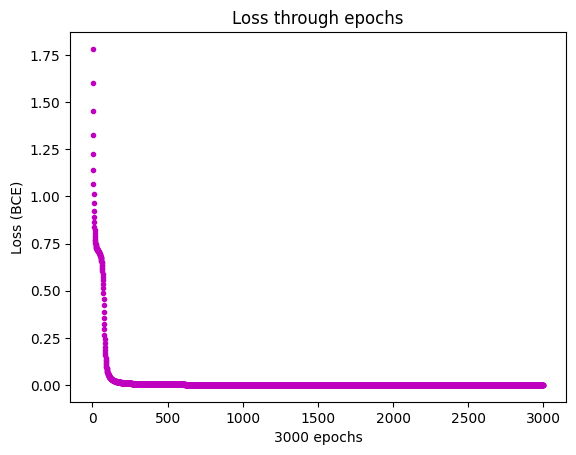

In [19]:
'''
Graficas sobre el rendimiento
'''
plt.plot(epochs, loss, '.m')
plt.ylabel(f"Loss ({get_net_type(net_type)})")
plt.xlabel(f"{iterations} epochs")
plt.title("Loss through epochs")
plt.show()

In [20]:
# Se grafica o la curva de contorno
delta = 100
x_grid = np.linspace(-2.8, 3.2, delta)
y_grid = np.linspace(-2.8, 3.2, delta)
mesh_x, mesh_y = np.meshgrid(x_grid, y_grid)
grid = np.zeros((100, 100))

for w, i in enumerate(y_grid):
  outline = np.zeros((1, input))
  outline[0, 1] = i
  for g, j in enumerate(y_grid):
    outline[0, 0] = j
    current_prediction = prediction(weight, bias, outline, net_function, layers)
    current_prediction = current_prediction[layers - 1]
    grid[w, g] = current_prediction[0, 0]

value_level = 1

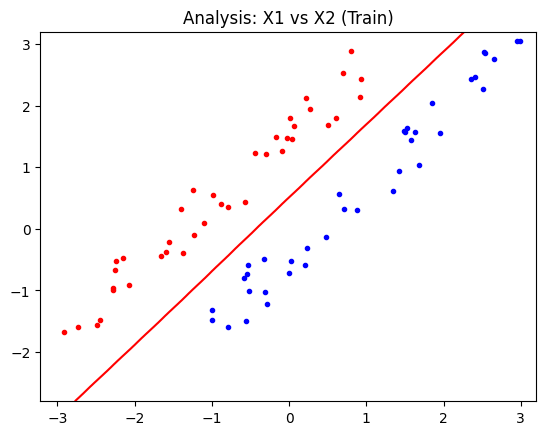

In [21]:
"""
Grafica de X1 vs X2 (Train)
"""
index_tag_class_1 = np.where(train_set["Y"] == 1)
index_tag_class_2 = np.where(train_set["Y"] == -1)

tag_class_1 = train_set[["X1", "X2"]].iloc[index_tag_class_1]
tag_class_2 = train_set[["X1", "X2"]].iloc[index_tag_class_2]

plt.plot(tag_class_1["X1"], tag_class_1["X2"], ".r", label="(Train) X1")
plt.plot(tag_class_2["X1"], tag_class_2["X2"], ".b", label="(Train) X2")


"""
Grafico de la curva de decisión
"""
plt.contour(mesh_x, mesh_y, grid, 1, colors = 'r')

plt.title("Analysis: X1 vs X2 (Train)")
plt.show()

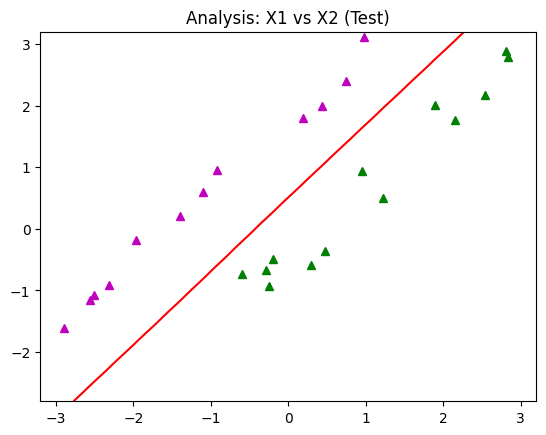

In [22]:
"""
Grafica de X1 vs X2 (Test)
"""
index_tag_class_1 = np.where(test_set["Y"] == 1)
index_tag_class_2 = np.where(test_set["Y"] == -1)

tag_class_1 = test_set[["X1", "X2"]].iloc[index_tag_class_1]
tag_class_2 = test_set[["X1", "X2"]].iloc[index_tag_class_2]

plt.plot(tag_class_1["X1"], tag_class_1["X2"], "^m", label="(Test) X1")
plt.plot(tag_class_2["X1"], tag_class_2["X2"], "^g", label="(Test) X2")


"""
Grafico de la curva de decisión
"""
plt.contour(mesh_x, mesh_y, grid, 1, colors = 'r')

plt.title("Analysis: X1 vs X2 (Test)")
plt.show()

In [23]:
'''
Extrayendo caracteristicas para la matriz de confusión
'''
unique_tags = np.unique(np.concatenate(Y))
confusion_matrix = np.zeros((unique_tags.shape[0], unique_tags.shape[0]))

for j in range(data):
  X1, Y1 = extract_data([input, output], j)
  current_prediction = prediction(weight, bias, X1, net_function, layers)
  predicted_tag = current_prediction[layers - 1][0][0]
  rounded_tag = np.round(predicted_tag)

  '''
  Para la construcción de la matriz de confusión (El grafico)
  '''
  for tag in range(unique_tags.shape[0]):
    if (rounded_tag == unique_tags[tag]):
      if (Y1[0][0] == rounded_tag):
        confusion_matrix[tag][tag] += 1
      else:
        for fix in range(unique_tags.shape[0]):
          confusion_matrix[tag][fix] += 1
        confusion_matrix[tag][tag] -= 1

# Mostrando la matriz en números
print(confusion_matrix)

[[37.  0.]
 [ 0. 38.]]


In [24]:
'''
Otras analisticas extraidas de la matriz de confusión
'''

TP = confusion_matrix[1][1] # True Positive
TN = confusion_matrix[0][0] # True Negative
FP = confusion_matrix[0][1] # False Positive
FN = confusion_matrix[1][0] # False Negative

precision = TP / (TP + FP)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

print(f"Precisión: {precision}")
print(f"Sensibilidad: {sensitivity}")
print(f"Especificidad: {specificity}")
print(f"Exactitud: {accuracy}")
print(f"F1 Score: {f1_score}")

Precisión: 1.0
Sensibilidad: 1.0
Especificidad: 1.0
Exactitud: 1.0
F1 Score: 1.0


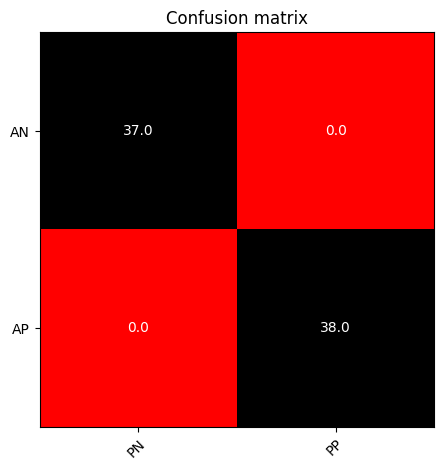

In [25]:
actual_label = ["AN", "AP"]
predicted_label = ["PN", "PP"]

fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix, cmap=plt.colormaps["flag"].resampled(7))

# Para agregar los labels
ax.set_xticks(np.arange(len(predicted_label)), labels=predicted_label)
ax.set_yticks(np.arange(len(actual_label)), labels=actual_label)


# Para centrar los textos
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Para poner los números a cada recuadro.
for i in range(len(predicted_label)):
    for j in range(len(actual_label)):
        text = ax.text(j, i, confusion_matrix[i, j], ha="center", va="center", color="w")

ax.set_title("Confusion matrix")
fig.tight_layout()
plt.show()

In [26]:
expected = Y.flatten()
prediction_to_analize = []


for j in range(data):
  X1, Y1 = extract_data([input, output], j)
  current_prediction = prediction(weight, bias, X1, net_function, layers)
  prediction_to_analize.append(current_prediction[layers - 1].flatten()[0])

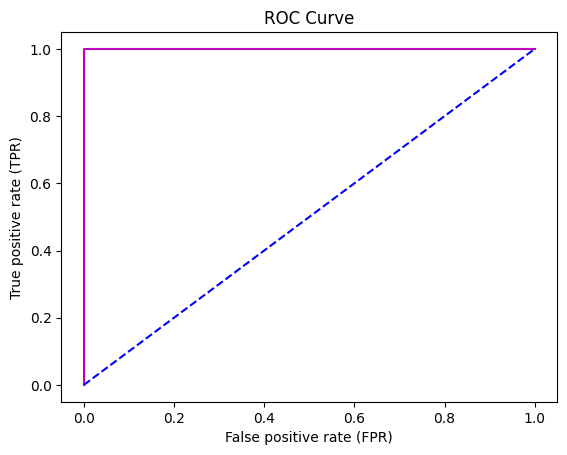

In [27]:
# Se define un vector de umbrales
thresholds = np.arange(0, 1.1, 0.1)

'''
Calculo de FPR y TPR como rates
'''
tpr = []
fpr = []
for threshold in thresholds:
    tpr.append(np.sum((expected == 1) & (prediction_to_analize >= threshold)) / np.sum(expected))
    fpr.append(np.sum((expected == 0) & (prediction_to_analize >= threshold)) / np.sum(expected == 0))

auc = np.trapz(tpr, fpr)

plt.plot(fpr, tpr, "-m", label=f"ROC de {auc} (AUC)")
plt.plot(thresholds, thresholds, "--b", label="Peor curva")
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.title("ROC Curve")
plt.show()